In [90]:
import pandas as pd
import numpy as np
import seaborn as sns
 
from matplotlib import pyplot as plt
 
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split


In [91]:
print(california_housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [93]:
data = pd.read_csv(load_boston()['filename'], skiprows=1)

In [94]:
data.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [95]:
data.info() # прочитаем информацию о датасете

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [96]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Text(0.5, 1.0, 'Missing values heatmap')

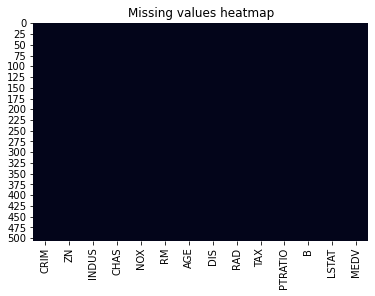

In [97]:
data.isnull().sum()
sns.heatmap(data.isnull(), cbar = False).set_title("Missing values heatmap")

Данные с пропусками отсутствуют

In [98]:
data.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


Используем логистическую регрессию для тестирования качества данных

In [99]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [100]:
data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [101]:
# выберем признаки
X = data [['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']]

# столбец 'MEDV' является целевой переменной
y = pd.Series (data['MEDV'])

X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [102]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

In [114]:
from sklearn.pipeline import make_pipeline # используем пайплайны для удобства
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 

model = make_pipeline(StandardScaler(), LogisticRegression(solver='lbfgs'))

Поделим данные на обучающую выборку и тестовую. Указываем в test_size долю датасета, которая пойдет на тестовую выбор

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [126]:
from sklearn import preprocessing
from sklearn import utils

In [127]:
lab_enc = preprocessing.LabelEncoder()
y_train = lab_enc.fit_transform(y_train)
y_test = lab_enc.fit_transform(y_test)

In [128]:
# обучаем на части датасета (train)

model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [129]:
predictions[:5] # посмотрим как выглядят наши предсказания

array([209,  91,  95, 119,  86])

Получаем наш скор (точность предсказания) на обучающей и тестовой выборках.

In [130]:
model.score(X_train, y_train)

0.2698019801980198

In [131]:
model.score(X_test,y_test)

0.0

Посмотрим на выбросы и удалим их

In [132]:
def get_boxplot(X, columns=[]):
    for i in columns:
        sns.boxplot(x=X[i])
        plt.show()
    pass  

def get_pairplot(X, columns=None):
    if columns is None:
        columns = list(X.columns)
    sns.pairplot(X[columns])
    pass    

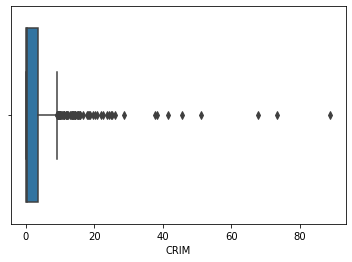

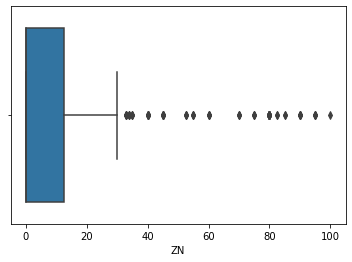

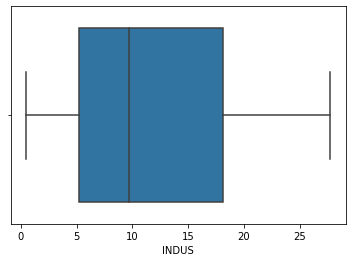

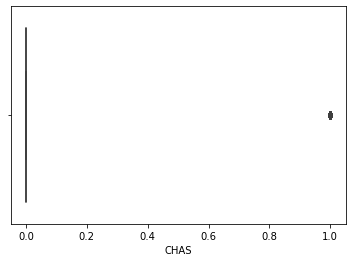

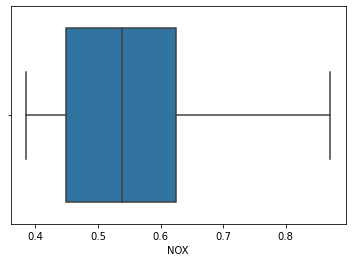

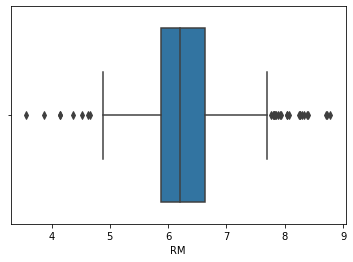

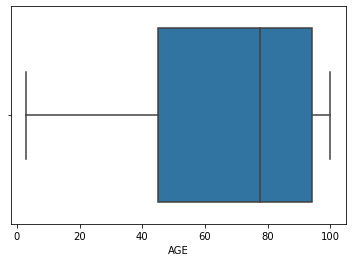

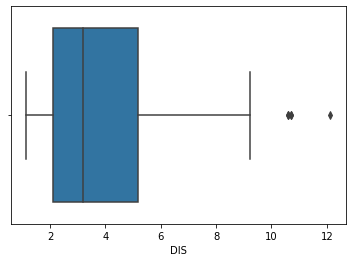

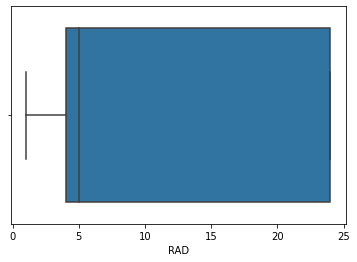

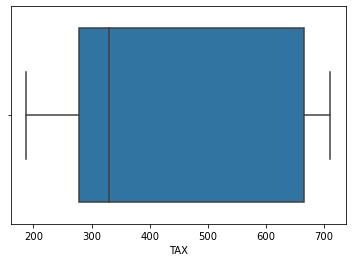

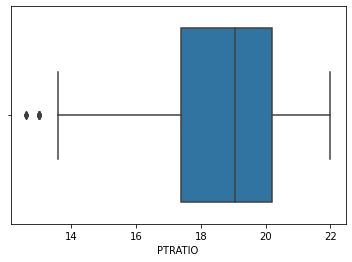

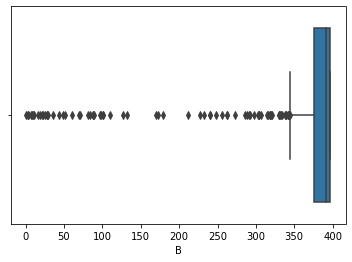

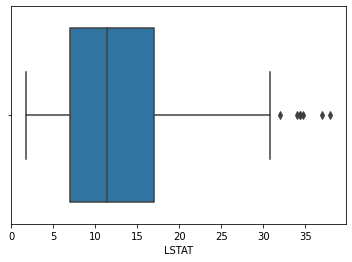

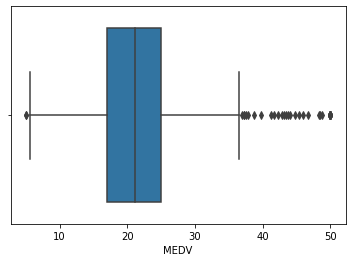

In [133]:
get_boxplot(data, columns=data.columns) # Построим boxplot

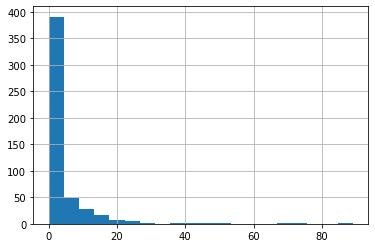

In [134]:
data['CRIM'].hist(bins=20) #уровень преступности на душу населения
plt.show()

In [135]:
data[data['CRIM'] > 25] # посмотрим на этот выброс

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
380,88.9762,0.0,18.1,0,0.671,6.968,91.9,1.4165,24,666,20.2,396.90,17.21,10.4
398,38.3518,0.0,18.1,0,0.693,5.453,100.0,1.4896,24,666,20.2,396.90,30.59,5.0
400,25.0461,0.0,18.1,0,0.693,5.987,100.0,1.5888,24,666,20.2,396.90,26.77,5.6
404,41.5292,0.0,18.1,0,0.693,5.531,85.4,1.6074,24,666,20.2,329.46,27.38,8.5
405,67.9208,0.0,18.1,0,0.693,5.683,100.0,1.4254,24,666,20.2,384.97,22.98,5.0
410,51.1358,0.0,18.1,0,0.597,5.757,100.0,1.4130,24,666,20.2,2.60,10.11,15.0
413,28.6558,0.0,18.1,0,0.597,5.155,100.0,1.5894,24,666,20.2,210.97,20.08,16.3
414,45.7461,0.0,18.1,0,0.693,4.519,100.0,1.6582,24,666,20.2,88.27,36.98,7.0
417,25.9406,0.0,18.1,0,0.679,5.304,89.1,1.6475,24,666,20.2,127.36,26.64,10.4
418,73.5341,0.0,18.1,0,0.679,5.957,100.0,1.8026,24,666,20.2,16.45,20.62,8.8


In [136]:
data1 = data[(data['CRIM'] < 25) | (data['CRIM'].isna())] # удалим эти выбросы

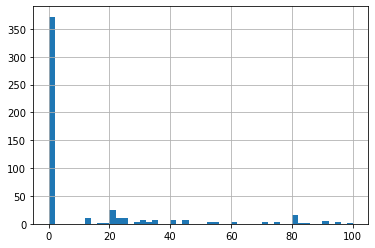

In [137]:
data['ZN'].hist(bins=50) #доля земли под жилую застройку
plt.show()

In [138]:
data[data['ZN'] > 60] # посмотрим на этот выброс

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
39,0.02763,75.0,2.95,0,0.4280,6.595,21.8,5.4011,3,252,18.3,395.63,4.32,30.8
40,0.03359,75.0,2.95,0,0.4280,7.024,15.8,5.4011,3,252,18.3,395.62,1.98,34.9
54,0.01360,75.0,4.00,0,0.4100,5.888,47.6,7.3197,3,469,21.1,396.90,14.80,18.9
55,0.01311,90.0,1.22,0,0.4030,7.249,21.9,8.6966,5,226,17.9,395.93,4.81,35.4
56,0.02055,85.0,0.74,0,0.4100,6.383,35.7,9.1876,2,313,17.3,396.90,5.77,24.7
57,0.01432,100.0,1.32,0,0.4110,6.816,40.5,8.3248,5,256,15.1,392.90,3.95,31.6
65,0.03584,80.0,3.37,0,0.3980,6.290,17.8,6.6115,4,337,16.1,396.90,4.67,23.5
66,0.04379,80.0,3.37,0,0.3980,5.787,31.1,6.6115,4,337,16.1,396.90,10.24,19.4
195,0.01381,80.0,0.46,0,0.4220,7.875,32.0,5.6484,4,255,14.4,394.23,2.97,50.0
196,0.04011,80.0,1.52,0,0.4040,7.287,34.1,7.3090,2,329,12.6,396.90,4.08,33.3


Т.к. выбросов по данному признаку слишклм много, пока их не будем удалять.

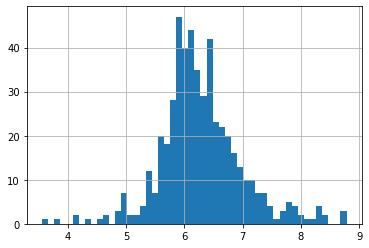

In [139]:
data['RM'].hist(bins=50) # среднее количество комнат в доме
plt.show()

In [140]:
data[data['RM'] < 5] # посмотрим на этот выброс

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
144,2.77974,0.0,19.58,0,0.871,4.903,97.8,1.3459,5,403,14.7,396.90,29.29,11.8
147,2.36862,0.0,19.58,0,0.871,4.926,95.7,1.4608,5,403,14.7,391.71,29.53,14.6
310,2.63548,0.0,9.90,0,0.544,4.973,37.8,2.5194,4,304,18.4,350.45,12.64,16.1
365,4.55587,0.0,18.10,0,0.718,3.561,87.9,1.6132,24,666,20.2,354.70,7.12,27.5
366,3.69695,0.0,18.10,0,0.718,4.963,91.4,1.7523,24,666,20.2,316.03,14.00,21.9
367,13.52220,0.0,18.10,0,0.631,3.863,100.0,1.5106,24,666,20.2,131.42,13.33,23.1
368,4.89822,0.0,18.10,0,0.631,4.970,100.0,1.3325,24,666,20.2,375.52,3.26,50.0
373,11.10810,0.0,18.10,0,0.668,4.906,100.0,1.1742,24,666,20.2,396.90,34.77,13.8
374,18.49820,0.0,18.10,0,0.668,4.138,100.0,1.1370,24,666,20.2,396.90,37.97,13.8
384,20.08490,0.0,18.10,0,0.700,4.368,91.2,1.4395,24,666,20.2,285.83,30.63,8.8


In [141]:
data[data['RM'] > 8] # посмотрим на этот выброс

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
97,0.12083,0.0,2.89,0,0.4450,8.069,76.0,3.4952,2,276,18.0,396.90,4.21,38.7
163,1.51902,0.0,19.58,1,0.6050,8.375,93.9,2.1620,5,403,14.7,388.45,3.32,50.0
204,0.02009,95.0,2.68,0,0.4161,8.034,31.9,5.1180,4,224,14.7,390.55,2.88,50.0
224,0.31533,0.0,6.20,0,0.5040,8.266,78.3,2.8944,8,307,17.4,385.05,4.14,44.8
225,0.52693,0.0,6.20,0,0.5040,8.725,83.0,2.8944,8,307,17.4,382.00,4.63,50.0
226,0.38214,0.0,6.20,0,0.5040,8.040,86.5,3.2157,8,307,17.4,387.38,3.13,37.6
232,0.57529,0.0,6.20,0,0.5070,8.337,73.3,3.8384,8,307,17.4,385.91,2.47,41.7
233,0.33147,0.0,6.20,0,0.5070,8.247,70.4,3.6519,8,307,17.4,378.95,3.95,48.3
253,0.36894,22.0,5.86,0,0.4310,8.259,8.4,8.9067,7,330,19.1,396.90,3.54,42.8
257,0.61154,20.0,3.97,0,0.6470,8.704,86.9,1.8010,5,264,13.0,389.70,5.12,50.0


Пока не будем удалять данные выбросы, т.к. они не являются ошибками заполнения

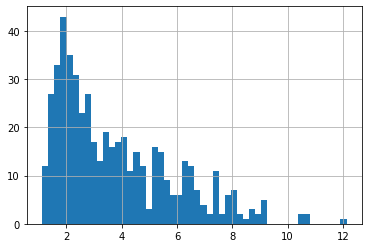

In [142]:
data['DIS'].hist(bins=50) # взвешенное расстояние до пяти  центров занятости
plt.show()

In [143]:
data[data['DIS'] > 10] # посмотрим на этот выброс

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
351,0.07950,60.0,1.69,0,0.411,6.579,35.9,10.7103,4,411,18.3,370.78,5.49,24.1
352,0.07244,60.0,1.69,0,0.411,5.884,18.5,10.7103,4,411,18.3,392.33,7.79,18.6
353,0.01709,90.0,2.02,0,0.410,6.728,36.1,12.1265,5,187,17.0,384.46,4.50,30.1
354,0.04301,80.0,1.91,0,0.413,5.663,21.9,10.5857,4,334,22.0,382.80,8.05,18.2
355,0.10659,80.0,1.91,0,0.413,5.936,19.5,10.5857,4,334,22.0,376.04,5.57,20.6


In [144]:
data1 = data[(data['DIS'] < 10) | (data['DIS'].isna())] # удалим эти выбросы

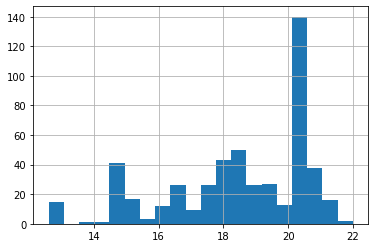

In [145]:
data['PTRATIO'].hist(bins=20) # соотношение учеников и учителей по городам
plt.show()

In [146]:
data[data['PTRATIO'] < 13] # посмотрим на этот выброс

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
196,0.04011,80.0,1.52,0,0.404,7.287,34.1,7.309,2,329,12.6,396.90,4.08,33.3
197,0.04666,80.0,1.52,0,0.404,7.107,36.6,7.309,2,329,12.6,354.31,8.61,30.3
198,0.03768,80.0,1.52,0,0.404,7.274,38.3,7.309,2,329,12.6,392.20,6.62,34.6


In [147]:
data1 = data[(data['PTRATIO'] > 13) | (data['PTRATIO'].isna())] # удалим эти выбросы

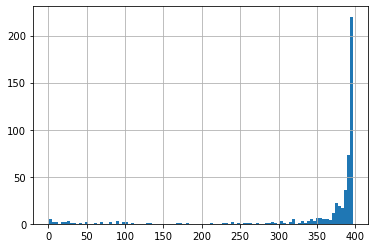

In [148]:
data['B'].hist(bins=100) # 1000 (Bk - 0,63) ^ 2, где Bk - доля афроамериканцев по городам
plt.show()

In [149]:
data[data['B'] < 200] # посмотрим на этот выброс

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
102,0.22876,0.0,8.56,0,0.520,6.405,85.4,2.7147,5,384,20.9,70.80,10.63,18.6
145,2.37934,0.0,19.58,0,0.871,6.130,100.0,1.4191,5,403,14.7,172.91,27.80,13.8
146,2.15505,0.0,19.58,0,0.871,5.628,100.0,1.5166,5,403,14.7,169.27,16.65,15.6
155,3.53501,0.0,19.58,1,0.871,6.152,82.6,1.7455,5,403,14.7,88.01,15.02,15.6
156,2.44668,0.0,19.58,0,0.871,5.272,94.0,1.7364,5,403,14.7,88.63,16.14,13.1
367,13.52220,0.0,18.10,0,0.631,3.863,100.0,1.5106,24,666,20.2,131.42,13.33,23.1
409,14.43830,0.0,18.10,0,0.597,6.852,100.0,1.4655,24,666,20.2,179.36,19.78,27.5
410,51.13580,0.0,18.10,0,0.597,5.757,100.0,1.4130,24,666,20.2,2.60,10.11,15.0
411,14.05070,0.0,18.10,0,0.597,6.657,100.0,1.5275,24,666,20.2,35.05,21.22,17.2
412,18.81100,0.0,18.10,0,0.597,4.628,100.0,1.5539,24,666,20.2,28.79,34.37,17.9


In [150]:
data1 = data[(data['B'] > 200) | (data['B'].isna())] # удалим эти выбросы

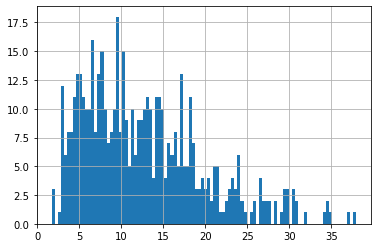

In [151]:
data['LSTAT'].hist(bins=100) # % более населения низкого соц статуса
plt.show()

In [152]:
data[data['LSTAT'] > 30] # посмотрим на этот выброс

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
48,0.25387,0.0,6.91,0,0.448,5.399,95.3,5.8700,3,233,17.9,396.90,30.81,14.4
141,1.62864,0.0,21.89,0,0.624,5.019,100.0,1.4394,4,437,21.2,396.90,34.41,14.4
373,11.10810,0.0,18.10,0,0.668,4.906,100.0,1.1742,24,666,20.2,396.90,34.77,13.8
374,18.49820,0.0,18.10,0,0.668,4.138,100.0,1.1370,24,666,20.2,396.90,37.97,13.8
384,20.08490,0.0,18.10,0,0.700,4.368,91.2,1.4395,24,666,20.2,285.83,30.63,8.8
385,16.81180,0.0,18.10,0,0.700,5.277,98.1,1.4261,24,666,20.2,396.90,30.81,7.2
387,22.59710,0.0,18.10,0,0.700,5.000,89.5,1.5184,24,666,20.2,396.90,31.99,7.4
388,14.33370,0.0,18.10,0,0.700,4.880,100.0,1.5895,24,666,20.2,372.92,30.62,10.2
398,38.35180,0.0,18.10,0,0.693,5.453,100.0,1.4896,24,666,20.2,396.90,30.59,5.0
412,18.81100,0.0,18.10,0,0.597,4.628,100.0,1.5539,24,666,20.2,28.79,34.37,17.9


In [153]:
data1 = data[(data['LSTAT'] < 30) | (data['LSTAT'].isna())] # удалим эти выбросы


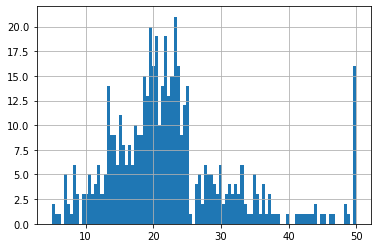

In [154]:
data['MEDV'].hist(bins=100) # Средняя стоимость домов в 1000 долларов
plt.show()

In [155]:
data[data['MEDV'] > 40] # посмотрим на этот выброс

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
98,0.08187,0.0,2.89,0,0.4450,7.820,36.9,3.4952,2,276,18.0,393.53,3.57,43.8
157,1.22358,0.0,19.58,0,0.6050,6.943,97.4,1.8773,5,403,14.7,363.43,4.59,41.3
161,1.46336,0.0,19.58,0,0.6050,7.489,90.8,1.9709,5,403,14.7,374.43,1.73,50.0
162,1.83377,0.0,19.58,1,0.6050,7.802,98.2,2.0407,5,403,14.7,389.61,1.92,50.0
163,1.51902,0.0,19.58,1,0.6050,8.375,93.9,2.1620,5,403,14.7,388.45,3.32,50.0
166,2.01019,0.0,19.58,0,0.6050,7.929,96.2,2.0459,5,403,14.7,369.30,3.70,50.0
186,0.05602,0.0,2.46,0,0.4880,7.831,53.6,3.1992,3,193,17.8,392.63,4.45,50.0
195,0.01381,80.0,0.46,0,0.4220,7.875,32.0,5.6484,4,255,14.4,394.23,2.97,50.0
202,0.02177,82.5,2.03,0,0.4150,7.610,15.7,6.2700,2,348,14.7,395.38,3.11,42.3
203,0.03510,95.0,2.68,0,0.4161,7.853,33.2,5.1180,4,224,14.7,392.78,3.81,48.5


In [156]:
data1.info() # прочитаем информацию о датасете

<class 'pandas.core.frame.DataFrame'>
Int64Index: 494 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     494 non-null    float64
 1   ZN       494 non-null    float64
 2   INDUS    494 non-null    float64
 3   CHAS     494 non-null    int64  
 4   NOX      494 non-null    float64
 5   RM       494 non-null    float64
 6   AGE      494 non-null    float64
 7   DIS      494 non-null    float64
 8   RAD      494 non-null    int64  
 9   TAX      494 non-null    int64  
 10  PTRATIO  494 non-null    float64
 11  B        494 non-null    float64
 12  LSTAT    494 non-null    float64
 13  MEDV     494 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 57.9 KB


Построим модель логистической регрессии на data1

In [158]:
# выберем признаки
X = data1 [['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']]

# столбец 'MEDV' является целевой переменной
y = pd.Series (data1['MEDV'])

X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [159]:
model1 = make_pipeline(StandardScaler(), LogisticRegression(solver='lbfgs'))

In [160]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)

In [161]:
lab_enc = preprocessing.LabelEncoder()
y_train = lab_enc.fit_transform(y_train)
y_test = lab_enc.fit_transform(y_test)

In [162]:
model1.fit(X_train, y_train)
predictions = model1.predict(X_test)

In [163]:
model1.score(X_train, y_train)

0.6938775510204082

In [164]:
model1.score(X_test,y_test)

0.007575757575757576

Масшабируем признаки

In [165]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import scale

In [166]:
X = data1 [['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']]

# столбец 'MEDV' является целевой переменной
y = pd.Series (data1['MEDV'])

X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [167]:
Xs = scale(X)

In [178]:
Xs_train, Xs_test, y_train, y_test = train_test_split(Xs, y, test_size=0.2, random_state=42)

In [179]:
model = make_pipeline(StandardScaler(), LogisticRegression(solver='lbfgs'))

lab_enc = preprocessing.LabelEncoder()
y_train = lab_enc.fit_transform(y_train)
y_test = lab_enc.fit_transform(y_test)

model.fit(Xs_train, y_train)

y_pred = model.predict(Xs_test)

/Users/wizard/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [180]:
model.score(Xs_train, y_train)

0.2936708860759494

In [181]:
model.score(Xs_test,y_test)

0.010101010101010102

Посмотрим на модель линейной регрессии, т.к. модель логистической регрессии показывает низкие результаты

In [182]:
from sklearn.linear_model import LinearRegression

In [183]:
X, y = data1[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']], data1['MEDV']

In [184]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [185]:
model = LinearRegression()

# обучаем на части датасета (train)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [186]:
model.score(X_train, y_train)

0.740751383284703

In [188]:
model.score(X_test, y_test)

0.7713771440608073

Дерево решений

In [189]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

def get_tree_dot_view(clf, feature_names=None, class_names=None):
    print(export_graphviz(clf, out_file=None, filled=True, feature_names=feature_names, class_names=class_names))

In [190]:
clf = DecisionTreeClassifier(max_depth=3)

In [191]:
lab_enc = preprocessing.LabelEncoder()
y = lab_enc.fit_transform(y)

In [192]:
clf.fit(X, y)

DecisionTreeClassifier(max_depth=3)

In [193]:
clf.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.27822558, 0.        , 0.155631  , 0.        , 0.        ,
       0.14048948, 0.11234243, 0.31331151])

[Text(167.4, 190.26, 'X[5] <= 7.783\ngini = 0.993\nsamples = 494\nvalue = [1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1\n1, 2, 2, 2, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1\n1, 1, 1, 3, 1, 1, 4, 1, 3, 4, 2, 2, 3, 2\n1, 3, 1, 2, 3, 2, 1, 3, 3, 1, 3, 1, 2, 5\n1, 1, 3, 2, 1, 1, 2, 2, 2, 2, 1, 3, 3, 1\n3, 3, 1, 1, 5, 1, 1, 3, 2, 3, 4, 2, 3, 2\n4, 2, 4, 2, 5, 6, 4, 5, 2, 3, 4, 5, 5, 2\n4, 4, 3, 6, 2, 3, 2, 3, 2, 5, 5, 2, 2, 7\n2, 3, 7, 1, 5, 2, 2, 3, 5, 2, 4, 4, 4, 7\n4, 4, 2, 1, 2, 4, 4, 5, 2, 3, 1, 3, 4, 3\n2, 3, 4, 8, 1, 1, 1, 1, 2, 1, 3, 1, 1, 2\n4, 2, 1, 1, 1, 2, 1, 1, 3, 2, 2, 1, 2, 2\n1, 3, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1\n1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 3, 1\n1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1\n1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n1, 16]'),
 Text(83.7, 135.9, 'X[7] <= 1.357\ngini = 0.993\nsamples = 473\nvalue = [1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1\n1, 2, 2, 2, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1\n1, 1, 1, 3, 1, 1, 4, 1, 3, 4, 2, 2, 3, 2\n1, 3, 1, 2, 3, 2, 1, 3, 3, 1, 3, 1, 2, 5\n1,

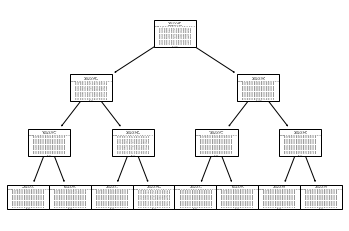

In [194]:
from sklearn import tree
tree.plot_tree(clf)